# ml lab7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

### 1. read `ex7data1.mat` data

In [2]:
data = scipy.io.loadmat('data/ex7data1.mat')
X = data['X']
X.shape

(300, 2)

### 2. plot data

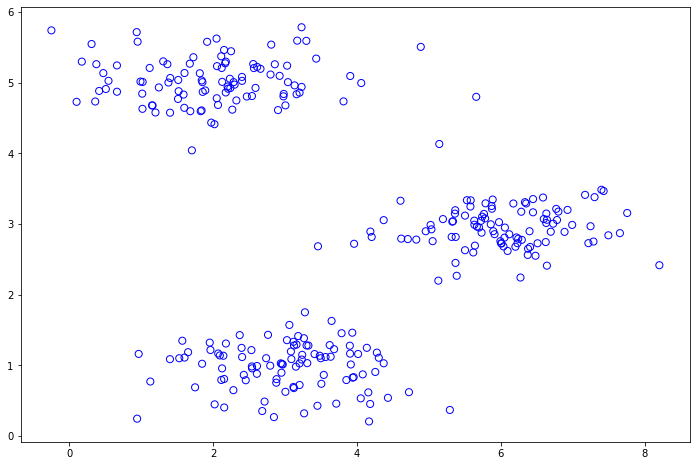

In [73]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b', s=50)
plt.show()

### 3-4. data covariance matrix + eigenvector

In [10]:
def pca(X):
    m = X.shape[0]
    sigma = 1 / m * X.T.dot(X)
    U, S, V = np.linalg.svd(sigma)
    return U, S

def feature_normalization(X):
    norm = (X - X.mean(axis=0)) / X.std(axis=0)
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    return norm, mu, sigma

X_norm, mu, sig = feature_normalization(X)
U, S = pca(X_norm)

print(f'Eigen Vector:\t{U[:,0].ravel()}')

Eigen Vector:	[-0.70710678  0.70710678]


### 5. plot eigenvector

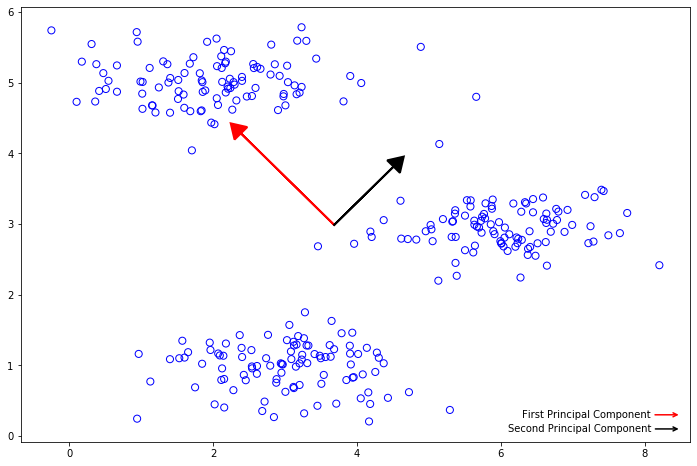

In [125]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b', s=50)

plt.arrow(
    mu[0],
    mu[1],
    1.5 * S[0]*U[0, 0],
    1.5 * S[0]*U[1, 0],
    head_width=0.25,
    head_length=0.2,
    fc='r',
    ec='r',
    lw=2,
    zorder=1000,
)
plt.arrow(
    mu[0],
    mu[1],
    1.5 * S[1]*U[0, 1],
    1.5 * S[1]*U[1, 1],
    head_width=0.25,
    head_length=0.2,
    fc='k',
    ec='k',
    lw=2,
    zorder=1000
)

plt.annotate('First Principal Component', xy=(8.5, 0.3), xytext=(6.3, 0.3), arrowprops={'arrowstyle': '->', 'lw': 1.5, 'ec': 'r'}, va='center')
plt.annotate('Second Principal Component', xy=(8.5, 0.1), xytext=(6.1, 0.1), arrowprops={'arrowstyle': '->', 'lw': 1.5}, va='center')
plt.show()

# 6.  dimensionality reduction

In [13]:
def project_data(X, U, K):
    return X.dot(U[:, :K])

### 7. reconstructing an approximation of the data

In [14]:
def recover_data(Z, U, K):
    return Z.dot(U[:, :K].T)

### 8. projections plot

In [16]:
Z = project_data(X_norm, U, 1)
X_rec = recover_data(Z, U, 1)
X_rec = X_rec * sig + mu

print(f'First Approximation:\t{X_rec[0].ravel()}')

First Approximation:	[1.83735239 4.60343487]


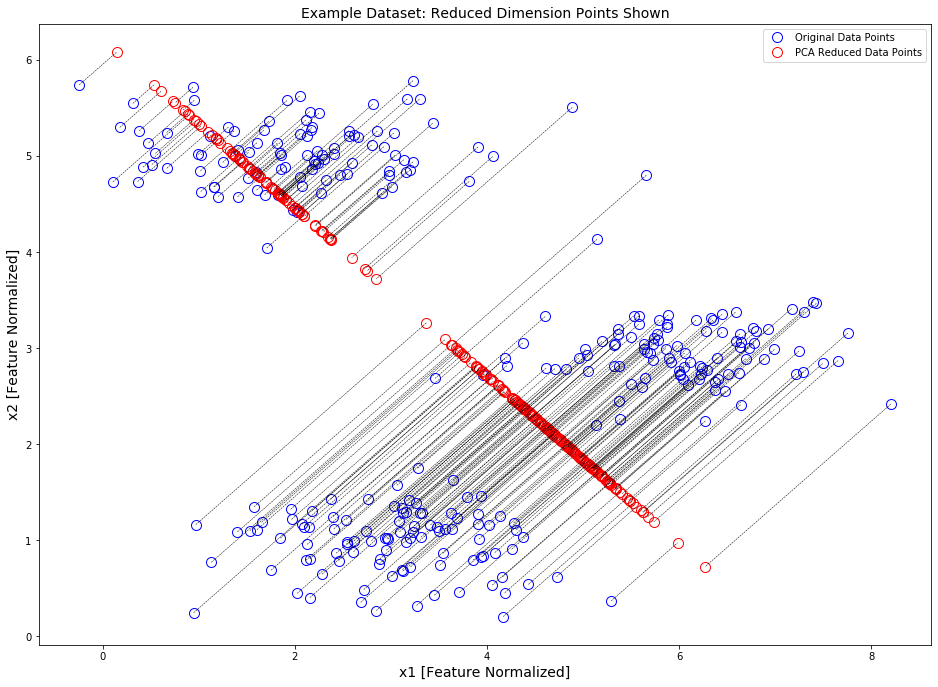

In [68]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_aspect('equal')
ax.grid(False)

ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mfc='none', label='Original Data Points')
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', ms=10, mfc='none', label='PCA Reduced Data Points')

for xnorm, xrec in zip(X, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], 'k--', lw=0.5)

ax.set_title('Example Dataset: Reduced Dimension Points Shown', fontsize=14)
ax.set_xlabel('x1 [Feature Normalized]', fontsize=14)
ax.set_ylabel('x2 [Feature Normalized]', fontsize=14)
plt.legend()
plt.show()